# Jupyter Data Science Workflow 

In [1]:
# source : http://jakevdp.github.io/blog/2017/03/03/reproducible-data-analysis-in-jupyter/

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
import os
from urllib.request import urlretrieve

import pandas as pd

In [ ]:
URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'
PATH = 'data/'

In [4]:
def get_fremont_data(path=PATH,filename="Fremont.csv", url=URL, force_download=False):
    file = path+filename
    if force_download or not os.path.exists(file):
        urlretrieve(url, file) 
    data = pd.read_csv(file, index_col='Date', parse_dates=True)
    data.columns = ['W', 'E']
    data['Total'] = data['W'] + data['E']
    return data

In [5]:
data = get_fremont_data()
data.head()

,W,E,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


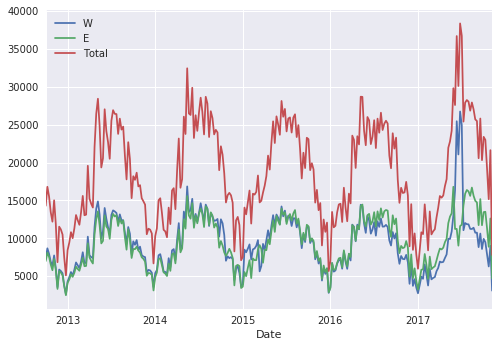

In [7]:
data.resample('W').sum().plot()

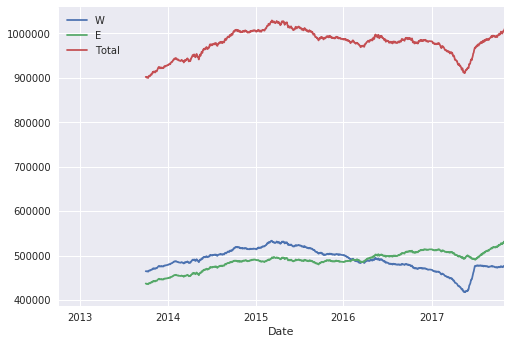

In [8]:
data.resample('D').sum().rolling(365).sum().plot()

(0, 1059460.05)

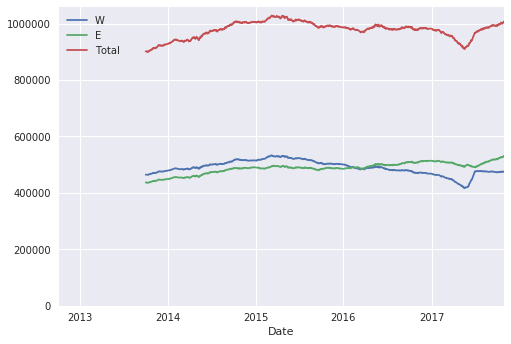

In [9]:
ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

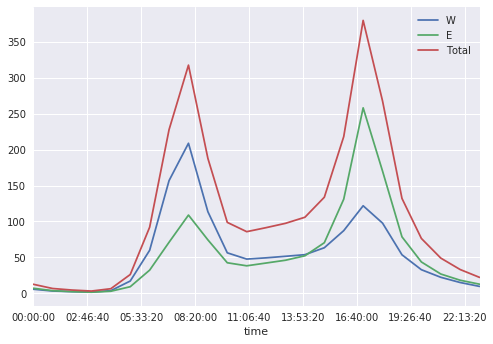

In [10]:
data.groupby(data.index.time).mean().plot()

In [11]:
pivoted = data.pivot_table('Total', index=data.index.time, columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


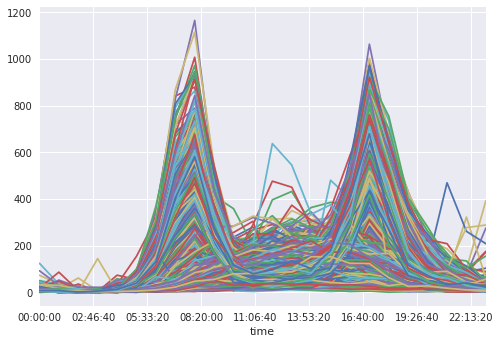

In [12]:
pivoted.plot(legend=False)

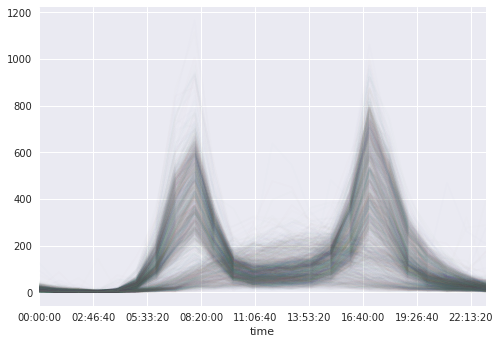

In [13]:
pivoted.plot(legend=False, alpha=0.01)